In [1]:
#importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing libraries for modeling
from sklearn.model_selection import train_test_split
from prepare import tts
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from env import get_connection
import acquire

## What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



My baseline prediction is that any passenger that was on the titanic died.

In [2]:
# function to get the titanic data from my acquire file
def prep_titanic():
    titan=acquire.get_titanic()
    titan.drop(columns=['passenger_id', 'embarked', 'deck', 'age', 'class'], inplace=True)
    dummy_var=pd.get_dummies(titan[['embark_town', 'sex']], drop_first=True)
    titan=pd.concat([titan, dummy_var], axis=1)
    return titan

In [3]:
#assigning the titanic data to a dataframe
df=prep_titanic()

In [4]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,male,1,0,7.2500,Southampton,0,0,1,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,1,1


In [5]:
df.dtypes

survived                     int64
pclass                       int64
sex                         object
sibsp                        int64
parch                        int64
fare                       float64
embark_town                 object
alone                        int64
embark_town_Queenstown       uint8
embark_town_Southampton      uint8
sex_male                     uint8
dtype: object

## preparing the data and splitting

In [6]:
#dropping columns that have been split into dummy variables
df = df.drop(columns=['embark_town', 'sex'])
df.head()

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,1,0,7.2500,0,0,1,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,1,0
3,1,1,1,0,53.1000,0,0,1,0
4,0,3,0,0,8.0500,1,0,1,1


In [7]:
#Adding another dummy variable for pclass and dropping the original column
df=pd.get_dummies(df, columns=['pclass'], drop_first=True)

In [8]:
df.head()

,survived,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,1,0,1
1,1,1,0,71.2833,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,1,0,0,1
3,1,1,0,53.1000,0,0,1,0,0,0
4,0,0,0,8.0500,1,0,1,1,0,1


In [9]:
#using the tts function from my prepare file to split into train, validate, test
t_train, t_val, t_test = tts(df)

stratify=survived


## Setting the baseline and getting accuracy

In [10]:
#setting a baseline to the original dataframe for a base accuracy result
df['baseline'] = 0

In [11]:
#accuracy of our baseline (0.62)
print(classification_report(df['survived'], df['baseline']))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       549
           1       0.00      0.00      0.00       342

    accuracy                           0.62       891
   macro avg       0.31      0.50      0.38       891
weighted avg       0.38      0.62      0.47       891



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [12]:
#assigning the X and y train variables for modeling
X_train = t_train.drop(columns=['survived'])
y_train = t_train['survived']

X_val = t_val.drop(columns=['survived'])
y_val = t_val['survived']

X_test = t_test.drop(columns=['survived'])
y_test = t_test['survived']

In [13]:
#making the decision tree and assigning the depth and seed
clf = DecisionTreeClassifier(max_depth= 3, random_state = 8675309)

In [14]:
# fitting the model using the train data
clf = clf.fit(X_train, y_train)

In [15]:
#getting score/accuracy of the trained model
clf.score(X_train, y_train)

0.8132530120481928

In [16]:
#fixing class names for the visual of the model
class_names = np.array(clf.classes_).astype('str').tolist()

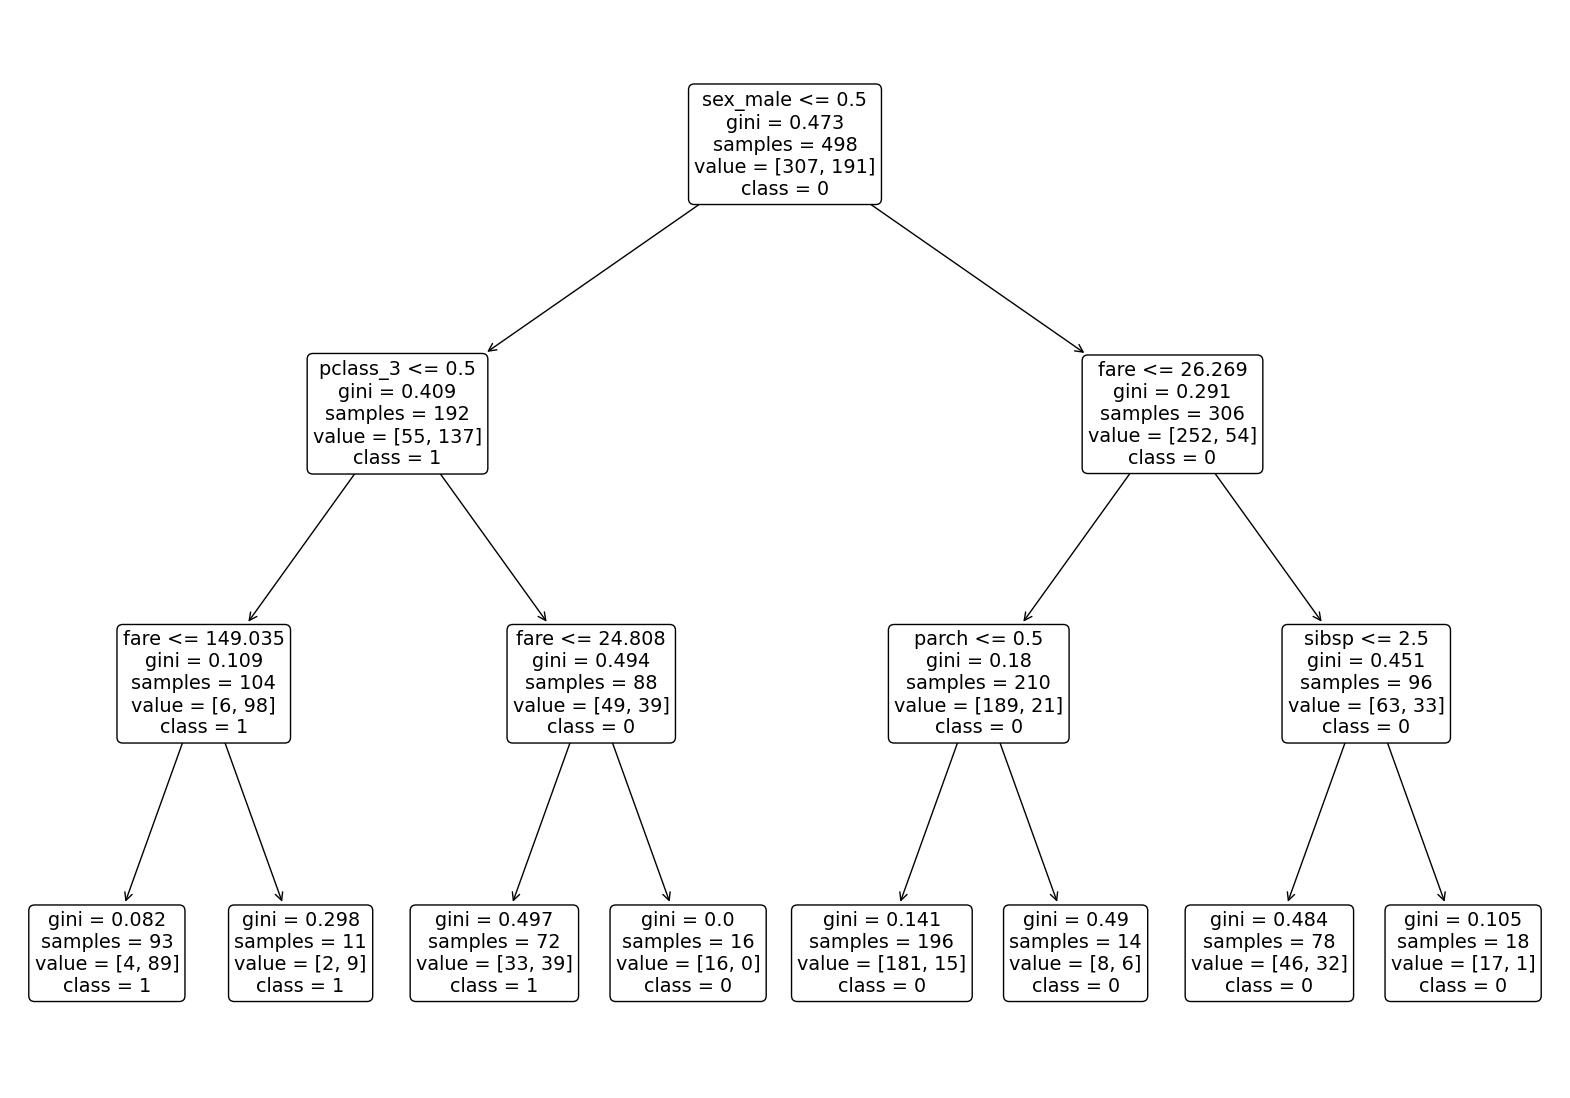

In [17]:
#plotting the decision tree so we can visualize our model
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=X_train.columns, class_names=class_names, rounded=True)
plt.show()

## Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [18]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [19]:
#assigning our y_pred to the prediction of the X_train
y_pred = clf.predict(X_train)

#printing the classification report of our trained model against the predictions
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       307
           1       0.78      0.72      0.75       191

    accuracy                           0.81       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



In [20]:
#making a confusion matrix for our trained model against the prediction
pd.DataFrame(data=confusion_matrix(y_train, y_pred), 
             columns= ['pred died', 'pred survived'], 
             index= ['actually died', 'actually survived'])

,pred died,pred survived
actually died,268,39
actually survived,54,137


## Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [21]:
#assigning the X_val to the new prediction
y_pred = clf.predict(X_val)

#printing a classification report for our model vs our validate predictions
print(classification_report(y_val, y_pred, target_names= ['died', 'survived']))

              precision    recall  f1-score   support

        died       0.79      0.89      0.84       132
    survived       0.78      0.62      0.69        82

    accuracy                           0.79       214
   macro avg       0.79      0.76      0.77       214
weighted avg       0.79      0.79      0.78       214



In [22]:
#Making a confusion matrix using the model and the predicted X_validate data
pd.DataFrame(data=confusion_matrix(y_val, y_pred), 
             columns= ['pred died', 'pred survived'], 
             index= ['actually died', 'actually survived'])

,pred died,pred survived
actually died,118,14
actually survived,31,51


In [181]:
#computing rates of our validate confusion matrix

tp=51
fp=14
tn=118
fn=31
pos=51+31
neg=118+14
print(f'True positive rate: {round(((tp/pos)*100), 2)}%')
print(f'False positive rate: {round(((fp/pos)*100), 2)}%')
print(f'True negative rate: {round(((tn/neg)*100), 2)}%')
print(f'False negative rate: {round(((fn/neg)*100), 2)}%')

True positive rate: 62.2%
False positive rate: 17.07%
True negative rate: 89.39%
False negative rate: 23.48%


## Run through steps 2-4 using a different max_depth value.



In [182]:
#for loop to show the results of different depths of decision trees

for i in range(1,21):
    trees= DecisionTreeClassifier(max_depth=i, random_state=8675309)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report= classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print (pd.DataFrame(report))
    print()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.829564     0.635572  0.790008     0.732568      0.778101
recall        0.898861     0.488528  0.790008     0.693694      0.790008
f1-score      0.862823     0.552432  0.790008     0.707628      0.780483
support    2897.000000  1046.000000  0.790008  3943.000000   3943.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.807578     0.700885   0.79229     0.754232      0.779275
recall        0.941664     0.378585   0.79229     0.660124      0.792290

In [187]:
metrics= []

for i in range (1,25):
    tree= DecisionTreeClassifier(max_depth=i, random_state=8675309)
    tree= tree.fit(X_train, y_train)
    in_sample_accuracy= tree.score(X_train, y_train)
    out_of_sample_accuracy= tree.score(X_val, y_val)
    
    output= {'max_depth': i, 'train_accuracy': in_sample_accuracy, 
             'validate_accuracy': out_of_sample_accuracy}
    
    metrics.append(output)
    
    
df= pd.DataFrame(metrics)
df['difference']= df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734720,0.734477,0.000243
1,2,0.790008,0.782377,0.007630
2,3,0.792290,0.784151,0.008139
3,4,0.796094,0.782969,0.013126
4,5,0.805732,0.787700,0.018032
5,6,0.814355,0.780012,0.034343
6,7,0.827289,0.781786,0.045503
7,8,0.838701,0.775281,0.063421
8,9,0.859244,0.765228,0.094017
9,10,0.882577,0.764636,0.117940


In [24]:
clf2 = DecisionTreeClassifier(max_depth= 10, random_state = 8675309)

In [25]:
clf2 = clf2.fit(X_train, y_train)

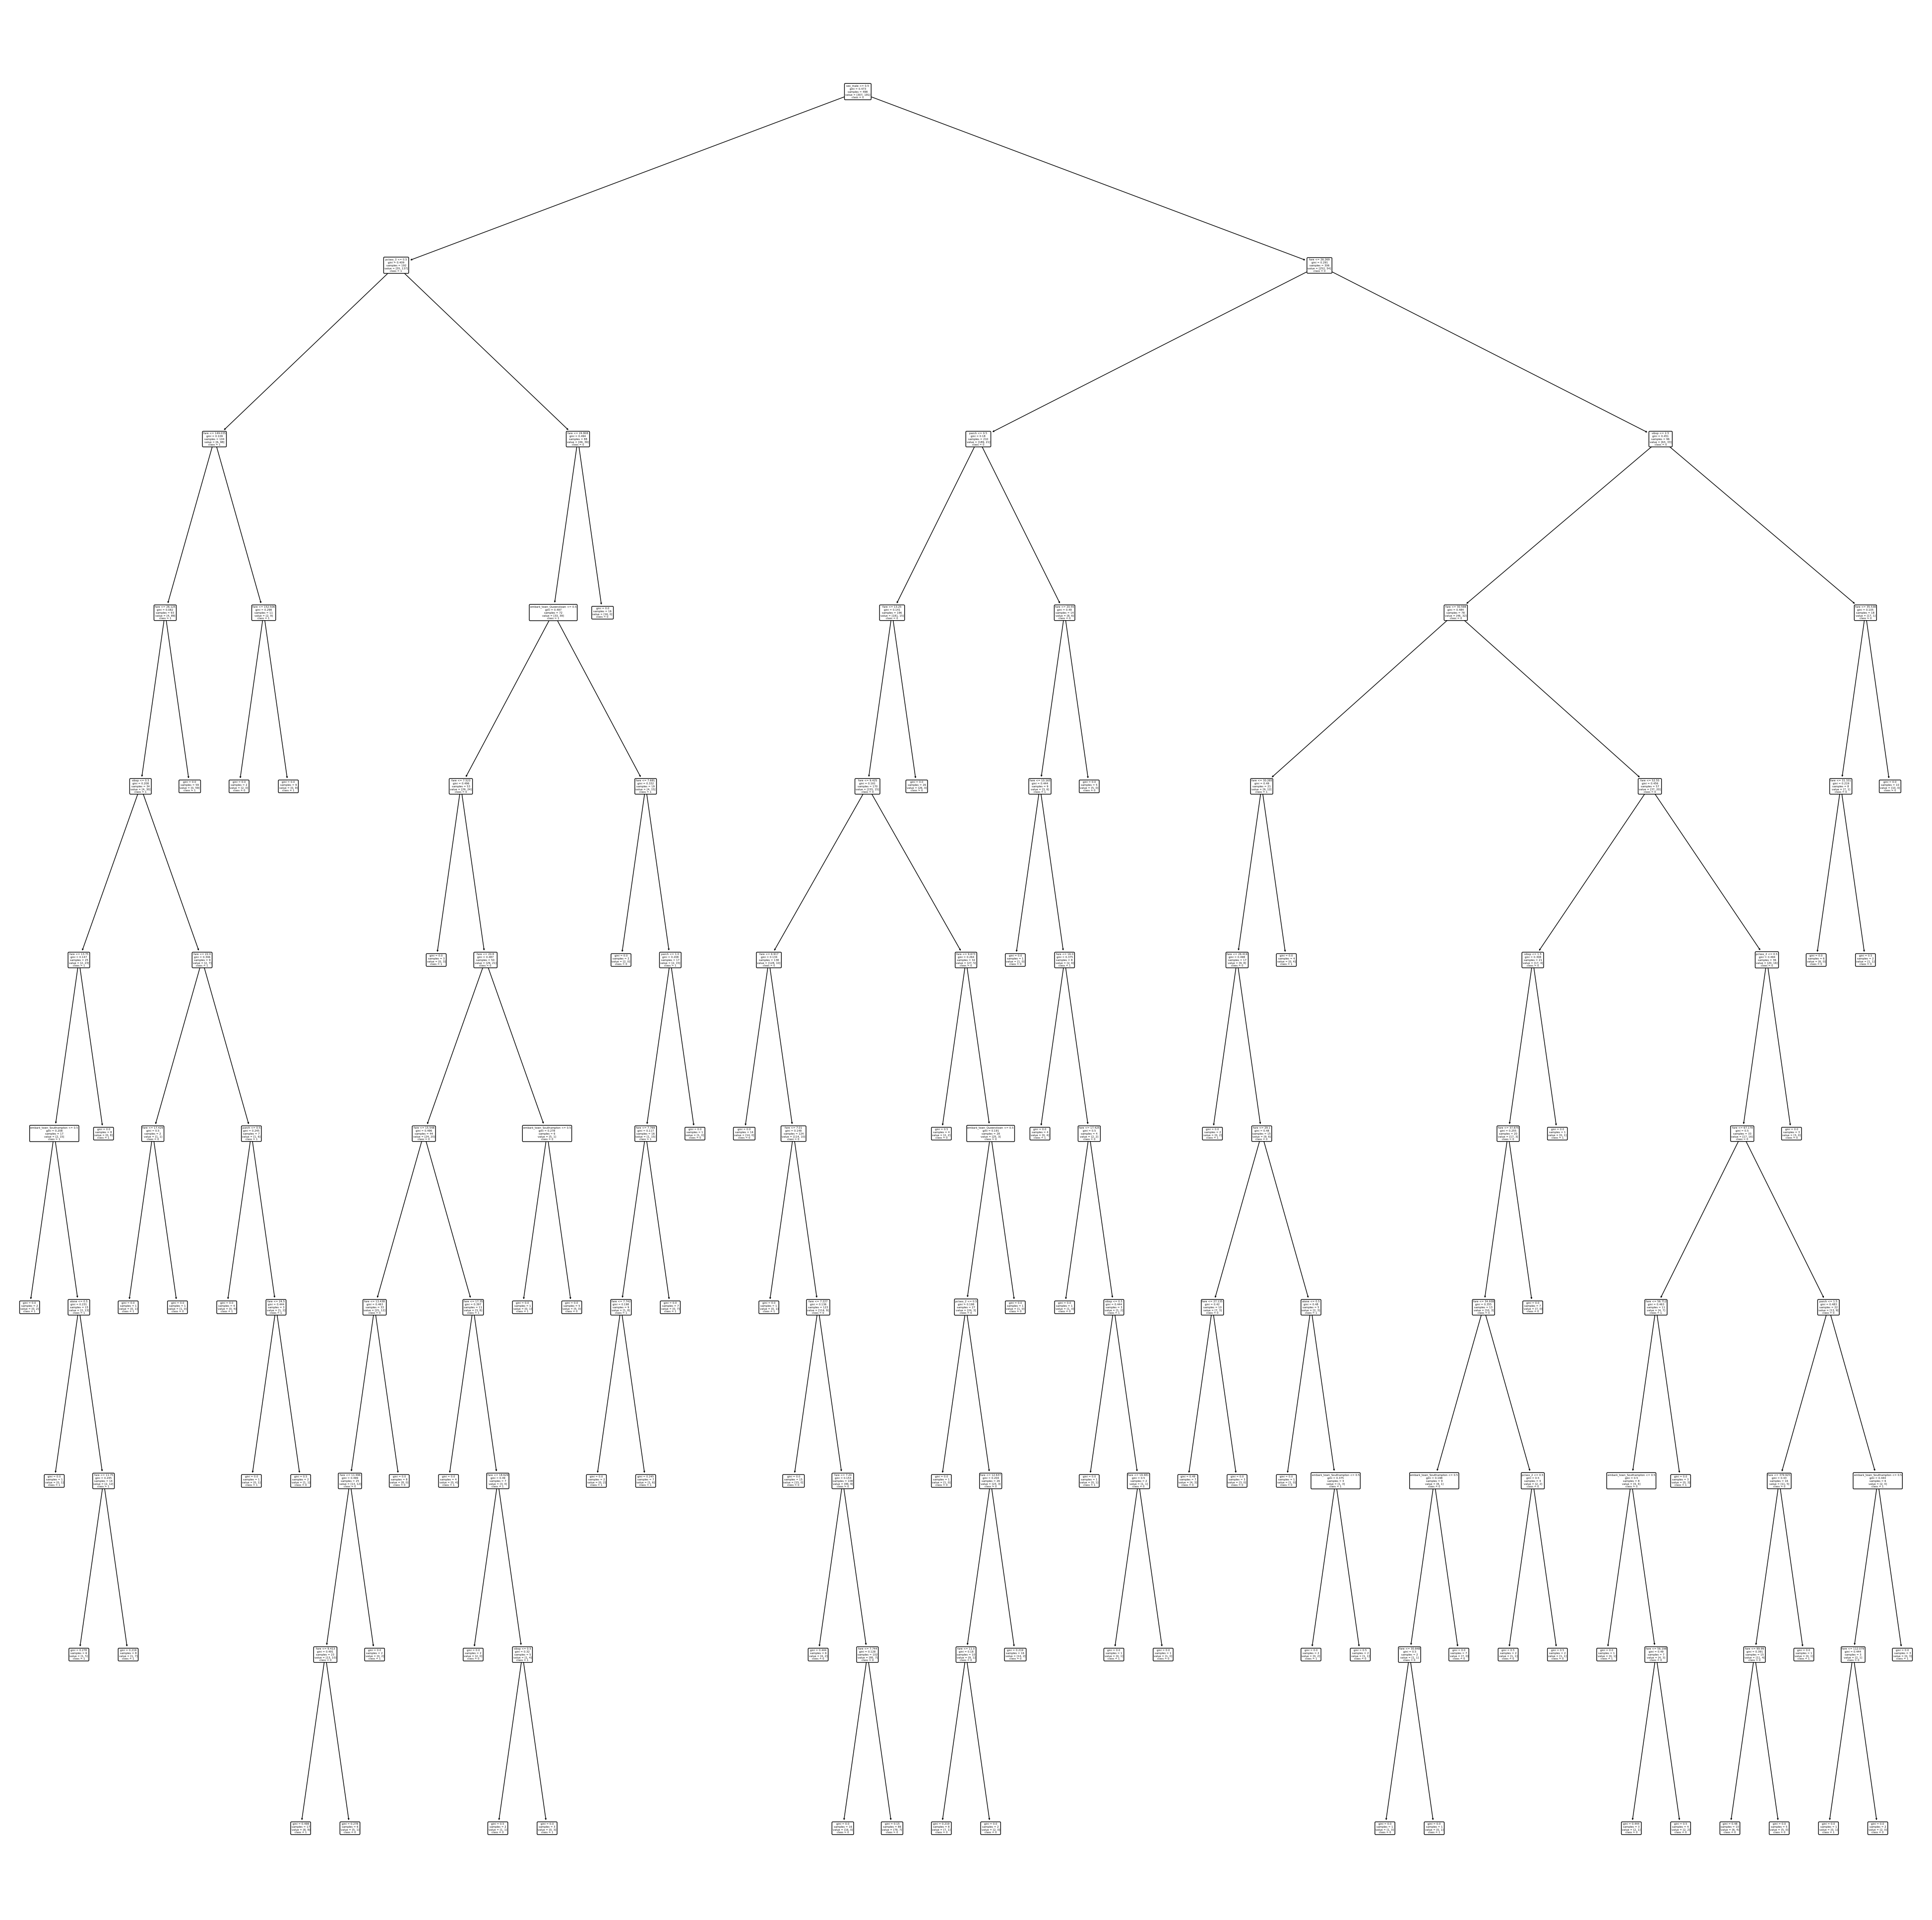

In [26]:
plt.figure(figsize=(50, 50))
plot_tree(clf2, feature_names=X_train.columns, class_names=class_names, rounded=True)
plt.show()

In [27]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.92


In [28]:
y_pred = clf2.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       307
           1       0.94      0.84      0.88       191

    accuracy                           0.92       498
   macro avg       0.92      0.90      0.91       498
weighted avg       0.92      0.92      0.91       498



In [29]:
pd.DataFrame(data=confusion_matrix(y_train, y_pred), 
             columns= ['pred died', 'pred survived'], 
             index= ['actually died', 'actually survived'])

,pred died,pred survived
actually died,296,11
actually survived,31,160


In [30]:
y_pred = clf2.predict(X_val)

print(classification_report(y_val, y_pred, target_names= ['died', 'survived']))

              precision    recall  f1-score   support

        died       0.78      0.87      0.82       132
    survived       0.75      0.61      0.67        82

    accuracy                           0.77       214
   macro avg       0.76      0.74      0.75       214
weighted avg       0.77      0.77      0.77       214



In [31]:
pd.DataFrame(data=confusion_matrix(y_val, y_pred), 
             columns= ['pred died', 'pred survived'], 
             index= ['actually died', 'actually survived'])

,pred died,pred survived
actually died,115,17
actually survived,32,50


In [188]:
tp=50
fp=17
tn=115
fn=32
pos=51+31
neg=118+14
print(f'True positive rate: {round(((tp/pos)*100), 2)}%')
print(f'False positive rate: {round(((fp/pos)*100), 2)}%')
print(f'True negative rate: {round(((tn/neg)*100), 2)}%')
print(f'False negative rate: {round(((fn/neg)*100), 2)}%')

True positive rate: 60.98%
False positive rate: 20.73%
True negative rate: 87.12%
False negative rate: 24.24%


## Which model performs better on your in-sample data?



The second model has .92 accuracy on in sample data. The first model only has .81 accuracy. This is a significant difference but may not necessarily be "better".

## Which model performs best on your out-of-sample data, the validate set?



The second model performs only slightly better on the validate data. The second model increased significantly on the train data, but only increased by less than 2% on the validate.

# Telco

In [33]:
def prep_telco():
    telco=acquire.get_telco_data()
    telco.drop(columns=(['customer_id', 'contract_type_id', 'payment_type_id', 
                         'internet_service_type_id', 'payment_type_id']), inplace=True)
    telco['churn_month']=pd.to_datetime(telco['churn_month'])
    telco['signup_date']=pd.to_datetime(telco['signup_date'])
    dummy_var=(pd.get_dummies(telco[['gender', 'partner', 'dependents', 'phone_service', 
                                    'multiple_lines', 'online_security', 'online_backup', 
                                    'device_protection', 'tech_support', 'streaming_tv', 
                                    'streaming_movies', 'paperless_billing', 
                                    'contract_type', 'internet_service_type', 
                                    'payment_type']], drop_first=True))
    telco=pd.concat([telco, dummy_var], axis=1)
    return telco

In [155]:
telco=prep_telco()

In [156]:
pd.set_option('display.max_columns', None)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,signup_date,churn_month,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,2021-04-21 18:07:34,NaT,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2021-04-21 18:07:34,NaT,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,2021-09-21 18:07:34,2022-01-31,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2020-12-21 18:07:34,2022-01-31,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,2021-10-21 18:07:34,2022-01-31,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1


In [157]:
telco= telco.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 
                          'multiple_lines', 'online_security', 'online_backup', 
                          'device_protection', 'tech_support', 'streaming_tv',
                          'streaming_movies', 'paperless_billing', 'contract_type', 
                          'internet_service_type', 'payment_type', 'signup_date', 
                          'monthly_charges', 'total_charges', 'churn_month'])

In [158]:
for v in telco['churn']:
    if v == 'Yes':
        telco.replace({'Yes': 1}, inplace = True)
    elif v == 'No':
        telco.replace({'No': 0}, inplace = True)

In [159]:
telco.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [160]:
telco.head()

,senior_citizen,tenure,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
1,0,9,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,4,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,1,13,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
4,1,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1


In [161]:
telco_train, telco_val, telco_test = tts(telco)

stratify=churn


In [162]:
telco_train.head()

,senior_citizen,tenure,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3758,0,4,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5749,0,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
1999,0,69,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0
5292,0,60,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
994,0,70,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [163]:
X_train = telco_train.drop(columns=['churn'])
y_train = telco_train['churn']

X_val = telco_val.drop(columns=['churn'])
y_val = telco_val['churn']

X_test = telco_test.drop(columns=['churn'])
y_test = telco_test['churn']

In [175]:
clft = DecisionTreeClassifier(max_depth= 3, random_state = 8675309)

In [176]:
clft = clft.fit(X_train, y_train)

In [177]:
clft.score(X_train, y_train)

0.7922901344154197

In [178]:
class_names = np.array(clft.classes_).astype('str').tolist()

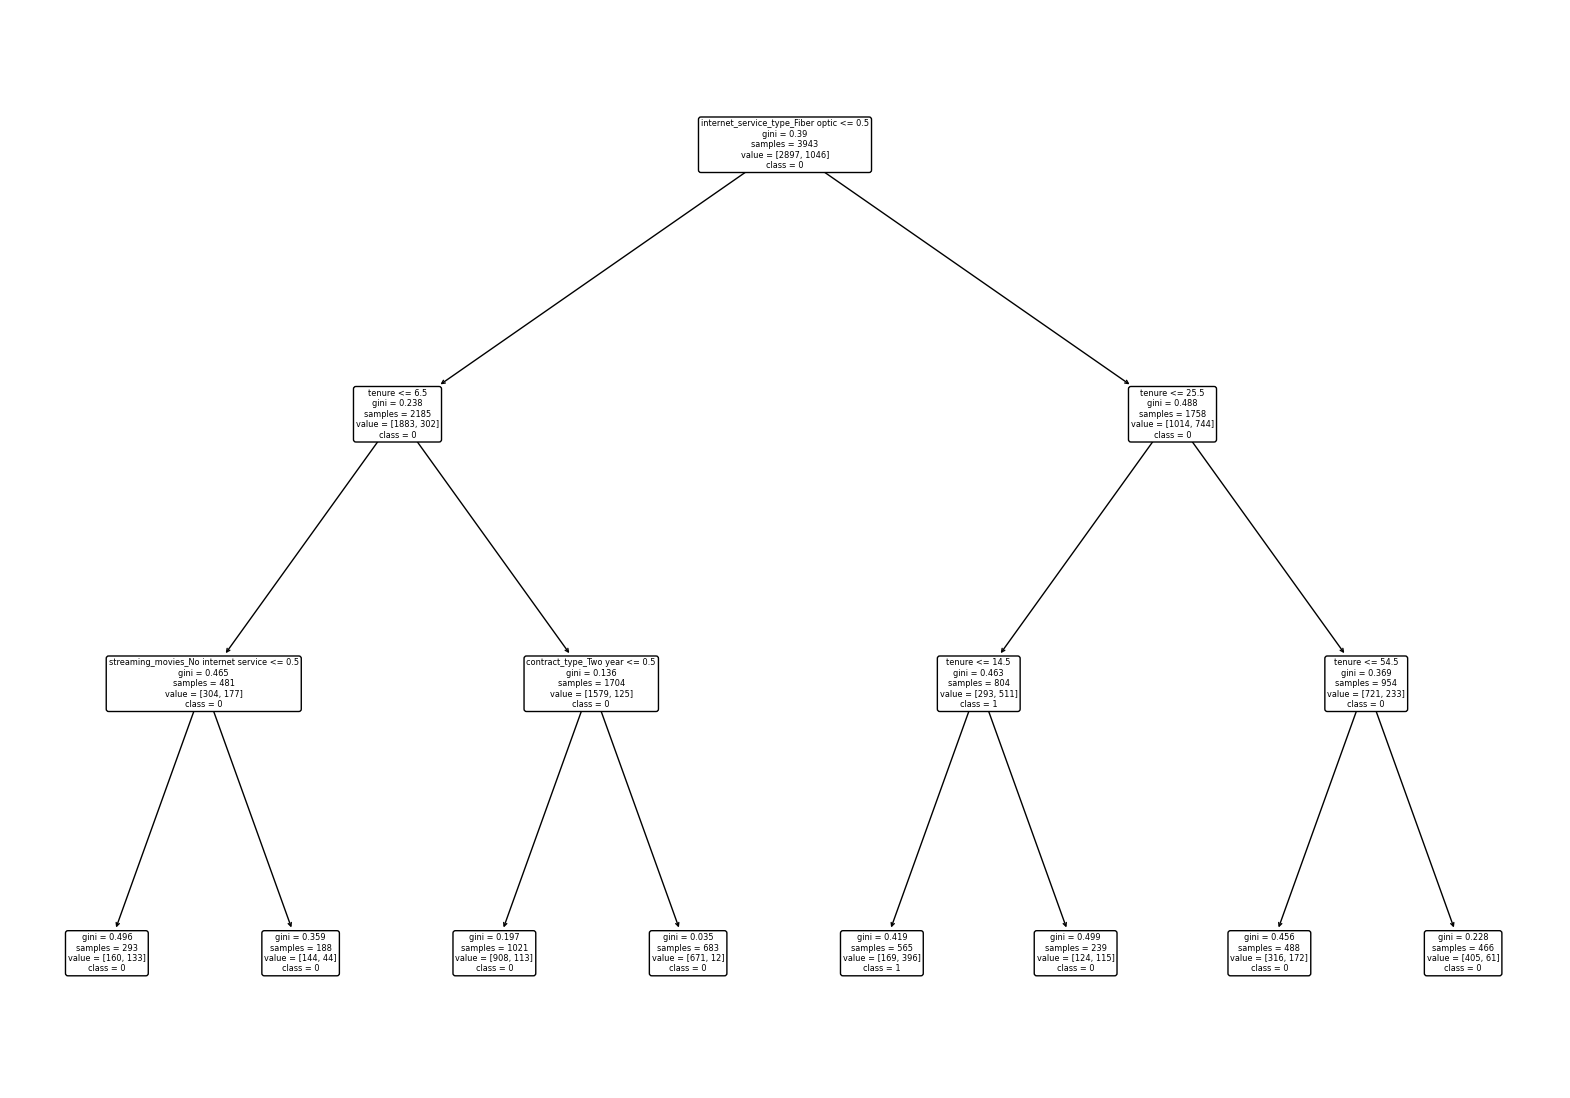

In [179]:
plt.figure(figsize=(20, 14))
plot_tree(clft, feature_names=X_train.columns, class_names=class_names, rounded=True)
plt.show()